In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

seed = np.random.seed(30)

In [188]:
train = pd.read_csv("train.csv/train.csv")
test = pd.read_csv("test.csv/test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_1,0,15.4140,-2.1016,10.4773,4.8941,12.6506,-3.7205,5.1426,17.7048,...,-2.8810,8.1647,1.0927,2.1215,17.6536,3.2253,-2.1234,8.9516,13.3485,-16.0178
1,train_2,0,12.3576,-8.1666,11.7785,2.8869,12.3183,-6.9847,4.2671,9.6710,...,0.2397,8.1569,-1.0753,5.4679,23.6376,-0.5022,9.2414,8.2427,10.7546,-3.4394
2,train_3,0,9.4142,-8.6132,7.2196,3.2496,10.6550,-3.3245,5.1010,18.5389,...,8.1638,9.2399,1.0160,7.4548,17.0933,0.0715,-4.0455,9.4586,17.8789,-13.9784
3,train_4,0,13.0647,-0.7917,13.0270,8.7865,10.2252,-2.9311,6.7299,11.8682,...,9.3914,7.5576,0.4784,1.2138,19.0498,-1.5634,7.3092,8.4344,18.1104,-7.7668
4,train_5,0,9.5222,-0.2727,8.2173,8.4071,12.7732,-10.3113,4.7486,13.7810,...,8.4802,0.9951,3.9973,1.9370,24.4786,-2.0294,-0.5454,8.7461,21.3832,14.1786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,train_159996,0,8.0801,-2.5523,10.6587,10.6660,8.7552,-10.8144,5.2019,21.1479,...,4.9773,7.5440,0.8520,4.9402,19.0033,1.5157,-9.3063,9.0586,14.9677,-11.2478
159996,train_159997,0,11.8371,-4.9598,12.9172,9.3759,13.0622,2.6849,5.2963,19.8298,...,2.3344,13.5478,3.1656,-1.5778,17.3154,-0.9673,4.9180,8.8015,13.2019,-21.5102
159997,train_159998,0,11.3368,1.2790,14.1568,11.9850,11.4859,0.2191,5.9112,19.7031,...,5.7440,11.3343,2.8999,4.8399,14.0429,0.5310,-0.0909,6.7786,13.0894,-0.6329
159998,train_159999,0,3.4660,-0.2570,4.3530,7.2045,11.4988,-7.0838,5.5081,13.7160,...,2.3471,2.6189,4.6409,9.0566,15.5558,-0.0071,1.0802,9.6420,14.3480,4.5444


In [189]:
X = train.drop(columns=['ID_code', 'target'], axis=1)
y = train['target']
test_df = test.drop(columns=['ID_code'])

**모델링**

Random Forest Classifier parameters:
- n_estimators : number of trees in the forest (default=100)
- max_depth : maximum depth of the tree (default=None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
- min_samples_split: minimum number of samples required to split an internal node (default=2)
- min_samples_leaf: minimum number of samples required to be at a leaf node (default=1)
- max_features: number of features to consider when looking for the best split (default=”sqrt”)

Minmaxscaling 안되는 이유: 폭이 좁아지기 때문에 트리 기반 모델에는 적합하지 않다고 생각하여 생략함. 실제로 minmaxscaling 후 모델 학습 결과 성능이 매우 안 좋게 나왔음. 

# SMOTE + Random Forest

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

In [56]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_sm.shape, y_train_sm.shape)
print('SMOTE 적용 전 값의 분포 :\n',pd.Series(y_train).value_counts())
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_sm).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (128000, 200) (128000,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (149679, 200) (149679,)
SMOTE 적용 전 값의 분포 :
 0    115138
1     12862
Name: target, dtype: int64
SMOTE 적용 후 값의 분포 :
 0    115138
1     34541
Name: target, dtype: int64


In [57]:
rf1 = RandomForestClassifier(random_state=42, verbose=2)
rf1.fit(X_train_sm, y_train_sm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  6.4min finished


RandomForestClassifier(random_state=42, verbose=2)

In [58]:
y_pred_rf1 = rf1.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [59]:
print(classification_report(y_test, y_pred_rf1))
print(f1_score(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28784
           1       1.00      0.00      0.00      3216

    accuracy                           0.90     32000
   macro avg       0.95      0.50      0.47     32000
weighted avg       0.91      0.90      0.85     32000

0.0006216972334473111


In [60]:
predict_rf1 = rf1.predict(test_sc)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [61]:
sub1 = pd.DataFrame({"ID_code":submission['ID_code'],
                         "target":predict_rf1})

In [62]:
sub1[['target']].value_counts()

target
0         39998
1             2
dtype: int64

In [63]:
sub1.to_csv('submission_r1.csv',index=False)

# Random Undersampling + Random Forest

In [169]:
X = train.drop(columns=['ID_code', 'target'], axis=1)
y = train['target']
test_df = test.drop(columns=['ID_code'])

In [190]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
X_under, y_under = under.fit_resample(X, y)
print(Counter(y_under))

Counter({0: 22968, 1: 16078})


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [44]:
rf_under = RandomForestClassifier(random_state=42, verbose=2)
rf_under.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.5min finished


RandomForestClassifier(random_state=42, verbose=2)

In [45]:
y_pred_under = rf_under.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [46]:
print(classification_report(y_test, y_pred_under))
print(f1_score(y_test, y_pred_under))

              precision    recall  f1-score   support

           0       0.72      0.92      0.80      4572
           1       0.80      0.49      0.61      3238

    accuracy                           0.74      7810
   macro avg       0.76      0.70      0.71      7810
weighted avg       0.75      0.74      0.72      7810

0.6077263117432251


In [47]:
predict_under = rf_under.predict(test_df)
sub_under = pd.DataFrame({"ID_code":submission['ID_code'],
                         "target":predict_under})
sub_under[['target']].value_counts()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.6s finished


target
0         35015
1          4985
dtype: int64

In [48]:
sub_under.to_csv('sub_under.csv',index=False)

# Random Undersampling + Random Forest + Randomized Search CV

In [129]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
X_under, y_under = under.fit_resample(X, y)
print(Counter(y_under))

Counter({0: 22968, 1: 16078})


In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [131]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param = dict(n_estimators=n_estimators,
            max_features=max_features,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap)

In [132]:
rf_rand = RandomForestClassifier(random_state=42)
rand_search = RandomizedSearchCV(rf_rand, param, cv=5, scoring='f1_macro', verbose=10)
rand_result = rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 1/5; 1/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.713 total time=12.2min
[CV 2/5; 1/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 2/5; 1/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.689 total time=12.0min
[CV 3/5; 1/10] START bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000
[CV 3/5; 1/10] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000;, score=0.700 total time=11.8min
[CV 4/5; 1/10] START bootstrap=True, max_depth=20, max_features=sqrt, mi

[CV 4/5; 6/10] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=311;, score=0.712 total time= 2.1min
[CV 5/5; 6/10] START bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=311
[CV 5/5; 6/10] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=311;, score=0.722 total time= 2.1min
[CV 1/5; 7/10] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1155
[CV 1/5; 7/10] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1155;, score=0.747 total time= 8.6min
[CV 2/5; 7/10] START bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1155
[CV 2/5; 7/10] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1155;, sco

In [133]:
print(rand_result.best_params_)

{'n_estimators': 1577, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}


In [134]:
rf_tuned = RandomForestClassifier(n_estimators=1577, min_samples_split=10, min_samples_leaf=2, max_features='auto', max_depth=30, bootstrap=False, random_state=42, verbose=2, n_jobs=-1)
rf_tuned.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1577building tree 2 of 1577
building tree 3 of 1577

building tree 4 of 1577
building tree 5 of 1577
building tree 6 of 1577
building tree 7 of 1577
building tree 8 of 1577
building tree 9 of 1577
building tree 10 of 1577
building tree 11 of 1577
building tree 12 of 1577
building tree 13 of 1577
building tree 14 of 1577
building tree 15 of 1577
building tree 16 of 1577
building tree 17 of 1577
building tree 18 of 1577
building tree 19 of 1577
building tree 20 of 1577
building tree 21 of 1577
building tree 22 of 1577
building tree 23 of 1577
building tree 24 of 1577
building tree 25 of 1577
building tree 26 of 1577
building tree 27 of 1577
building tree 28 of 1577
building tree 29 of 1577
building tree 30 of 1577
building tree 31 of 1577
building tree 32 of 1577
building tree 33 of 1577
building tree 34 of 1577
building tree 35 of 1577
building tree 36 of 1577
building tree 37 of 1577
building tree 38 of 1577
building tree 39 of 1577


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s


building tree 40 of 1577
building tree 41 of 1577
building tree 42 of 1577
building tree 43 of 1577
building tree 44 of 1577
building tree 45 of 1577
building tree 46 of 1577
building tree 47 of 1577
building tree 48 of 1577
building tree 49 of 1577
building tree 50 of 1577
building tree 51 of 1577
building tree 52 of 1577
building tree 53 of 1577
building tree 54 of 1577
building tree 55 of 1577
building tree 56 of 1577
building tree 57 of 1577
building tree 58 of 1577
building tree 59 of 1577
building tree 60 of 1577
building tree 61 of 1577
building tree 62 of 1577
building tree 63 of 1577
building tree 64 of 1577
building tree 65 of 1577
building tree 66 of 1577
building tree 67 of 1577
building tree 68 of 1577
building tree 69 of 1577
building tree 70 of 1577
building tree 71 of 1577
building tree 72 of 1577
building tree 73 of 1577
building tree 74 of 1577
building tree 75 of 1577
building tree 76 of 1577
building tree 77 of 1577
building tree 78 of 1577
building tree 79 of 1577


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.2s


building tree 157 of 1577
building tree 158 of 1577
building tree 159 of 1577
building tree 160 of 1577
building tree 161 of 1577
building tree 162 of 1577
building tree 163 of 1577
building tree 164 of 1577
building tree 165 of 1577
building tree 166 of 1577
building tree 167 of 1577
building tree 168 of 1577
building tree 169 of 1577
building tree 170 of 1577
building tree 171 of 1577
building tree 172 of 1577
building tree 173 of 1577
building tree 174 of 1577
building tree 175 of 1577
building tree 176 of 1577
building tree 177 of 1577
building tree 178 of 1577
building tree 179 of 1577
building tree 180 of 1577
building tree 181 of 1577
building tree 182 of 1577
building tree 183 of 1577
building tree 184 of 1577
building tree 185 of 1577
building tree 186 of 1577
building tree 187 of 1577
building tree 188 of 1577
building tree 189 of 1577
building tree 190 of 1577
building tree 191 of 1577
building tree 192 of 1577
building tree 193 of 1577
building tree 194 of 1577
building tre

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.4min


building tree 358 of 1577
building tree 359 of 1577
building tree 360 of 1577
building tree 361 of 1577
building tree 362 of 1577
building tree 363 of 1577
building tree 364 of 1577
building tree 365 of 1577
building tree 366 of 1577
building tree 367 of 1577
building tree 368 of 1577
building tree 369 of 1577
building tree 370 of 1577
building tree 371 of 1577
building tree 372 of 1577
building tree 373 of 1577
building tree 374 of 1577
building tree 375 of 1577
building tree 376 of 1577
building tree 377 of 1577
building tree 378 of 1577
building tree 379 of 1577
building tree 380 of 1577
building tree 381 of 1577
building tree 382 of 1577
building tree 383 of 1577
building tree 384 of 1577
building tree 385 of 1577
building tree 386 of 1577
building tree 387 of 1577
building tree 388 of 1577
building tree 389 of 1577
building tree 390 of 1577
building tree 391 of 1577
building tree 392 of 1577
building tree 393 of 1577
building tree 394 of 1577
building tree 395 of 1577
building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.7min


building tree 641 of 1577
building tree 642 of 1577
building tree 643 of 1577
building tree 644 of 1577
building tree 645 of 1577
building tree 646 of 1577
building tree 647 of 1577
building tree 648 of 1577
building tree 649 of 1577
building tree 650 of 1577
building tree 651 of 1577
building tree 652 of 1577
building tree 653 of 1577
building tree 654 of 1577
building tree 655 of 1577
building tree 656 of 1577
building tree 657 of 1577
building tree 658 of 1577
building tree 659 of 1577
building tree 660 of 1577
building tree 661 of 1577
building tree 662 of 1577
building tree 663 of 1577
building tree 664 of 1577
building tree 665 of 1577
building tree 666 of 1577
building tree 667 of 1577
building tree 668 of 1577
building tree 669 of 1577
building tree 670 of 1577
building tree 671 of 1577
building tree 672 of 1577
building tree 673 of 1577
building tree 674 of 1577
building tree 675 of 1577
building tree 676 of 1577
building tree 677 of 1577
building tree 678 of 1577
building tre

building tree 957 of 1577
building tree 958 of 1577
building tree 959 of 1577
building tree 960 of 1577
building tree 961 of 1577
building tree 962 of 1577
building tree 963 of 1577
building tree 964 of 1577
building tree 965 of 1577
building tree 966 of 1577
building tree 967 of 1577
building tree 968 of 1577
building tree 969 of 1577
building tree 970 of 1577
building tree 971 of 1577
building tree 972 of 1577
building tree 973 of 1577
building tree 974 of 1577
building tree 975 of 1577
building tree 976 of 1577
building tree 977 of 1577
building tree 978 of 1577
building tree 979 of 1577
building tree 980 of 1577
building tree 981 of 1577
building tree 982 of 1577
building tree 983 of 1577
building tree 984 of 1577
building tree 985 of 1577
building tree 986 of 1577
building tree 987 of 1577
building tree 988 of 1577
building tree 989 of 1577
building tree 990 of 1577
building tree 991 of 1577
building tree 992 of 1577
building tree 993 of 1577
building tree 994 of 1577
building tre

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.4min


building tree 1006 of 1577
building tree 1007 of 1577
building tree 1008 of 1577
building tree 1009 of 1577
building tree 1010 of 1577
building tree 1011 of 1577
building tree 1012 of 1577
building tree 1013 of 1577
building tree 1014 of 1577
building tree 1015 of 1577
building tree 1016 of 1577
building tree 1017 of 1577
building tree 1018 of 1577
building tree 1019 of 1577
building tree 1020 of 1577
building tree 1021 of 1577
building tree 1022 of 1577
building tree 1023 of 1577
building tree 1024 of 1577
building tree 1025 of 1577
building tree 1026 of 1577
building tree 1027 of 1577
building tree 1028 of 1577
building tree 1029 of 1577
building tree 1030 of 1577
building tree 1031 of 1577
building tree 1032 of 1577
building tree 1033 of 1577
building tree 1034 of 1577
building tree 1035 of 1577
building tree 1036 of 1577
building tree 1037 of 1577
building tree 1038 of 1577
building tree 1039 of 1577
building tree 1040 of 1577
building tree 1041 of 1577
building tree 1042 of 1577
b

building tree 1310 of 1577
building tree 1311 of 1577
building tree 1312 of 1577
building tree 1313 of 1577
building tree 1314 of 1577
building tree 1315 of 1577
building tree 1316 of 1577
building tree 1317 of 1577
building tree 1318 of 1577
building tree 1319 of 1577
building tree 1320 of 1577
building tree 1321 of 1577
building tree 1322 of 1577
building tree 1323 of 1577
building tree 1324 of 1577
building tree 1325 of 1577
building tree 1326 of 1577
building tree 1327 of 1577
building tree 1328 of 1577
building tree 1329 of 1577
building tree 1330 of 1577
building tree 1331 of 1577
building tree 1332 of 1577
building tree 1333 of 1577
building tree 1334 of 1577
building tree 1335 of 1577
building tree 1336 of 1577
building tree 1337 of 1577
building tree 1338 of 1577
building tree 1339 of 1577
building tree 1340 of 1577
building tree 1341 of 1577
building tree 1342 of 1577
building tree 1343 of 1577
building tree 1344 of 1577
building tree 1345 of 1577
building tree 1346 of 1577
b

[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  6.4min


building tree 1451 of 1577
building tree 1452 of 1577
building tree 1453 of 1577
building tree 1454 of 1577
building tree 1455 of 1577
building tree 1456 of 1577
building tree 1457 of 1577
building tree 1458 of 1577
building tree 1459 of 1577
building tree 1460 of 1577
building tree 1461 of 1577
building tree 1462 of 1577
building tree 1463 of 1577
building tree 1464 of 1577
building tree 1465 of 1577
building tree 1466 of 1577
building tree 1467 of 1577
building tree 1468 of 1577
building tree 1469 of 1577
building tree 1470 of 1577
building tree 1471 of 1577
building tree 1472 of 1577
building tree 1473 of 1577
building tree 1474 of 1577
building tree 1475 of 1577
building tree 1476 of 1577
building tree 1477 of 1577
building tree 1478 of 1577
building tree 1479 of 1577
building tree 1480 of 1577
building tree 1481 of 1577
building tree 1482 of 1577
building tree 1483 of 1577
building tree 1484 of 1577
building tree 1485 of 1577
building tree 1486 of 1577
building tree 1487 of 1577
b

[Parallel(n_jobs=-1)]: Done 1577 out of 1577 | elapsed:  7.0min finished


RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=1577, n_jobs=-1,
                       random_state=42, verbose=2)

In [135]:
y_pred_tuned = rf_tuned.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:    1.7s
[Parallel(n_jobs=8)]: Done 1577 out of 1577 | elapsed:    1.9s finished


In [136]:
print(classification_report(y_test, y_pred_tuned))
print(f1_score(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82      4572
           1       0.81      0.54      0.65      3238

    accuracy                           0.76      7810
   macro avg       0.78      0.73      0.73      7810
weighted avg       0.77      0.76      0.75      7810

0.6502316960148286


In [137]:
predict_tuned = rf_tuned.predict(test_df)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    4.6s
[Parallel(n_jobs=8)]: Done 1442 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 1577 out of 1577 | elapsed:    7.0s finished


In [138]:
sub_tuned = pd.DataFrame({"ID_code":submission['ID_code'],
                         "target":predict_tuned})

In [139]:
sub_tuned[['target']].value_counts()

target
0         34893
1          5107
dtype: int64

In [141]:
sub_tuned.to_csv('sub_tuned.csv',index=False)

* Kaggle score: 0.6975

# Random Oversampling + Random Forest

In [142]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy=0.7, random_state=42)
X_over, y_over = over.fit_resample(X, y)
print(Counter(y_over))

Counter({0: 143922, 1: 100745})


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [144]:
rf_over = RandomForestClassifier(random_state=42, verbose=2)
rf_over.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  8.7min finished


RandomForestClassifier(random_state=42, verbose=2)

In [145]:
y_pred_over = rf_over.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished


In [146]:
print(classification_report(y_test, y_pred_over))
print(f1_score(y_test, y_pred_over))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28599
           1       1.00      0.99      1.00     20335

    accuracy                           1.00     48934
   macro avg       1.00      1.00      1.00     48934
weighted avg       1.00      1.00      1.00     48934

0.9965952827395639


- Oversampling + Random Forest는 과적합을 야기함. 

# 이상치 제거 + Random Undersampling + Random Forest

In [155]:
def IQR_method (df,n,features):
    
    outlier_list = []
    
    for column in features:
                
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column],75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of outliers is:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [156]:
# detecting outliers
feature_list = X.columns
Outliers_IQR = IQR_method(train,1,feature_list)

Total number of outliers is: 20


In [157]:
train.loc[Outliers_IQR]

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
1187,train_1188,0,19.4528,1.4695,8.7188,7.4001,8.8817,-4.7534,5.3335,20.3677,...,7.5664,7.0509,0.1519,6.9879,21.7097,-0.0560,5.0320,9.4724,15.8393,4.6325
16739,train_16740,0,19.6265,1.0887,12.6772,11.0310,10.3932,2.6342,6.3777,21.5851,...,8.4401,3.3030,1.2841,1.6603,23.6011,-1.4067,3.4457,8.9676,14.1532,17.0564
26358,train_26359,0,1.8504,-5.7105,7.0007,6.8453,12.8737,1.7470,5.9486,10.0181,...,-0.9160,9.9635,2.4152,3.4112,19.5347,-0.5712,4.4722,9.3376,16.2905,-2.2500
40371,train_40372,0,1.5307,-1.4912,6.7652,10.4569,9.5310,-9.0788,5.1578,18.6897,...,13.1585,1.5571,1.0449,1.4243,15.3721,-1.4168,11.6506,7.4034,11.8202,8.9127
56963,train_56964,1,19.3565,-6.3492,6.9024,3.7639,11.9921,-15.3037,4.9869,9.8215,...,2.9437,8.5964,1.8487,9.7236,21.6338,-1.0987,1.2508,8.5356,17.8354,1.4112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77106,train_77107,0,7.3328,-3.2550,10.0398,5.9148,14.7473,-8.0441,4.9486,13.1161,...,10.4123,7.5147,6.2292,2.5887,18.2952,0.1795,-0.7716,9.4204,16.3616,-13.1888
119305,train_119306,0,11.1643,0.6800,13.5671,5.9153,13.4223,-2.0696,6.0333,16.2007,...,3.6159,4.2638,6.7681,8.1482,22.0781,0.4315,0.1860,9.2819,19.6865,0.3932
76519,train_76520,0,9.7477,-8.2508,10.3166,7.5349,12.3749,-18.1234,4.3653,19.4884,...,-11.0857,8.6027,6.6979,4.0728,19.0227,-1.0531,1.0306,9.9781,14.8798,14.8894
153240,train_153241,0,13.0476,0.8838,11.6864,6.7566,9.0549,-18.5419,5.0291,14.5819,...,-9.8679,4.5980,6.0870,5.1854,21.0508,-2.5717,6.1730,8.3301,17.2114,2.3925


In [158]:
# dropping outliers
train_out = train.drop(Outliers_IQR, axis = 0).reset_index(drop=True)
train_out

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_1,0,15.4140,-2.1016,10.4773,4.8941,12.6506,-3.7205,5.1426,17.7048,...,-2.8810,8.1647,1.0927,2.1215,17.6536,3.2253,-2.1234,8.9516,13.3485,-16.0178
1,train_2,0,12.3576,-8.1666,11.7785,2.8869,12.3183,-6.9847,4.2671,9.6710,...,0.2397,8.1569,-1.0753,5.4679,23.6376,-0.5022,9.2414,8.2427,10.7546,-3.4394
2,train_3,0,9.4142,-8.6132,7.2196,3.2496,10.6550,-3.3245,5.1010,18.5389,...,8.1638,9.2399,1.0160,7.4548,17.0933,0.0715,-4.0455,9.4586,17.8789,-13.9784
3,train_4,0,13.0647,-0.7917,13.0270,8.7865,10.2252,-2.9311,6.7299,11.8682,...,9.3914,7.5576,0.4784,1.2138,19.0498,-1.5634,7.3092,8.4344,18.1104,-7.7668
4,train_5,0,9.5222,-0.2727,8.2173,8.4071,12.7732,-10.3113,4.7486,13.7810,...,8.4802,0.9951,3.9973,1.9370,24.4786,-2.0294,-0.5454,8.7461,21.3832,14.1786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158779,train_159996,0,8.0801,-2.5523,10.6587,10.6660,8.7552,-10.8144,5.2019,21.1479,...,4.9773,7.5440,0.8520,4.9402,19.0033,1.5157,-9.3063,9.0586,14.9677,-11.2478
158780,train_159997,0,11.8371,-4.9598,12.9172,9.3759,13.0622,2.6849,5.2963,19.8298,...,2.3344,13.5478,3.1656,-1.5778,17.3154,-0.9673,4.9180,8.8015,13.2019,-21.5102
158781,train_159998,0,11.3368,1.2790,14.1568,11.9850,11.4859,0.2191,5.9112,19.7031,...,5.7440,11.3343,2.8999,4.8399,14.0429,0.5310,-0.0909,6.7786,13.0894,-0.6329
158782,train_159999,0,3.4660,-0.2570,4.3530,7.2045,11.4988,-7.0838,5.5081,13.7160,...,2.3471,2.6189,4.6409,9.0566,15.5558,-0.0071,1.0802,9.6420,14.3480,4.5444


In [159]:
X_out = train_out.drop(columns=['ID_code', 'target'], axis=1)
y_out = train_out['target']
test_df = test.drop(columns=['ID_code'])

In [160]:
from imblearn.under_sampling import RandomUnderSampler
under_out = RandomUnderSampler(sampling_strategy=0.3, random_state=42)
X_under_out, y_under_out = under_out.fit_resample(X_out, y_out)
print(Counter(y_under_out))

Counter({0: 53000, 1: 15900})


In [161]:
print('적용 전 값의 분포 :\n',pd.Series(y_out).value_counts())
print('적용 후 값의 분포 :\n',pd.Series(y_under_out).value_counts())

적용 전 값의 분포 :
 0    142884
1     15900
Name: target, dtype: int64
적용 후 값의 분포 :
 0    53000
1    15900
Name: target, dtype: int64


In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_under_out, y_under_out, test_size=0.2, random_state=42)

In [163]:
rf_under_out = RandomForestClassifier(random_state=42, verbose=2)
rf_under_out.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.9min finished


RandomForestClassifier(random_state=42, verbose=2)

In [164]:
y_pred_under_out = rf_under_out.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


In [165]:
print(classification_report(y_test, y_pred_under_out))
print(f1_score(y_test, y_pred_under_out))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     10585
           1       0.90      0.04      0.08      3195

    accuracy                           0.78     13780
   macro avg       0.84      0.52      0.48     13780
weighted avg       0.80      0.78      0.69     13780

0.08183990442054957


In [166]:
predict_rf_out = rf_under_out.predict(test_df)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


In [167]:
sub_rf_out = pd.DataFrame({"ID_code":submission['ID_code'],
                         "target":predict_rf_out})

In [168]:
sub_rf_out[['target']].value_counts()

target
0         39799
1           201
dtype: int64

# 이상치 제거 + Random Undersampling + Random Forest (Random Search CV)

In [122]:
rf_tuned_out = RandomForestClassifier(n_estimators=944, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=2, bootstrap=False, random_state=42, verbose=2)
rf_tuned_out.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 944
building tree 2 of 944
building tree 3 of 944
building tree 4 of 944
building tree 5 of 944
building tree 6 of 944
building tree 7 of 944
building tree 8 of 944
building tree 9 of 944
building tree 10 of 944
building tree 11 of 944
building tree 12 of 944
building tree 13 of 944
building tree 14 of 944
building tree 15 of 944
building tree 16 of 944
building tree 17 of 944
building tree 18 of 944
building tree 19 of 944
building tree 20 of 944
building tree 21 of 944
building tree 22 of 944
building tree 23 of 944
building tree 24 of 944
building tree 25 of 944
building tree 26 of 944
building tree 27 of 944
building tree 28 of 944
building tree 29 of 944
building tree 30 of 944
building tree 31 of 944
building tree 32 of 944
building tree 33 of 944
building tree 34 of 944
building tree 35 of 944
building tree 36 of 944
building tree 37 of 944
building tree 38 of 944
building tree 39 of 944
building tree 40 of 944
building tree 41 of 944
building tree 42 of 944
b

building tree 335 of 944
building tree 336 of 944
building tree 337 of 944
building tree 338 of 944
building tree 339 of 944
building tree 340 of 944
building tree 341 of 944
building tree 342 of 944
building tree 343 of 944
building tree 344 of 944
building tree 345 of 944
building tree 346 of 944
building tree 347 of 944
building tree 348 of 944
building tree 349 of 944
building tree 350 of 944
building tree 351 of 944
building tree 352 of 944
building tree 353 of 944
building tree 354 of 944
building tree 355 of 944
building tree 356 of 944
building tree 357 of 944
building tree 358 of 944
building tree 359 of 944
building tree 360 of 944
building tree 361 of 944
building tree 362 of 944
building tree 363 of 944
building tree 364 of 944
building tree 365 of 944
building tree 366 of 944
building tree 367 of 944
building tree 368 of 944
building tree 369 of 944
building tree 370 of 944
building tree 371 of 944
building tree 372 of 944
building tree 373 of 944
building tree 374 of 944


building tree 664 of 944
building tree 665 of 944
building tree 666 of 944
building tree 667 of 944
building tree 668 of 944
building tree 669 of 944
building tree 670 of 944
building tree 671 of 944
building tree 672 of 944
building tree 673 of 944
building tree 674 of 944
building tree 675 of 944
building tree 676 of 944
building tree 677 of 944
building tree 678 of 944
building tree 679 of 944
building tree 680 of 944
building tree 681 of 944
building tree 682 of 944
building tree 683 of 944
building tree 684 of 944
building tree 685 of 944
building tree 686 of 944
building tree 687 of 944
building tree 688 of 944
building tree 689 of 944
building tree 690 of 944
building tree 691 of 944
building tree 692 of 944
building tree 693 of 944
building tree 694 of 944
building tree 695 of 944
building tree 696 of 944
building tree 697 of 944
building tree 698 of 944
building tree 699 of 944
building tree 700 of 944
building tree 701 of 944
building tree 702 of 944
building tree 703 of 944


[Parallel(n_jobs=1)]: Done 944 out of 944 | elapsed:  3.0min finished


RandomForestClassifier(bootstrap=False, max_depth=2, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=944, random_state=42, verbose=2)

In [123]:
y_pred_tuned_out = rf_tuned_out.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 944 out of 944 | elapsed:    0.5s finished


In [124]:
print(classification_report(y_test, y_pred_tuned_out))
print(f1_score(y_test, y_pred_tuned_out))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     10585
           1       0.00      0.00      0.00      3195

    accuracy                           0.77     13780
   macro avg       0.38      0.50      0.43     13780
weighted avg       0.59      0.77      0.67     13780

0.0


# Random Undersampling + Feature Importance +  Random Forest 

In [192]:
clf = RandomForestClassifier(random_state=42, verbose=2, n_jobs=-1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.5s


building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.8s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

In [193]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

var_81     0.019921
var_139    0.014146
var_12     0.013672
var_174    0.010620
var_53     0.010466
             ...   
var_47     0.003586
var_4      0.003582
var_38     0.003544
var_73     0.003529
var_185    0.003301
Length: 200, dtype: float64

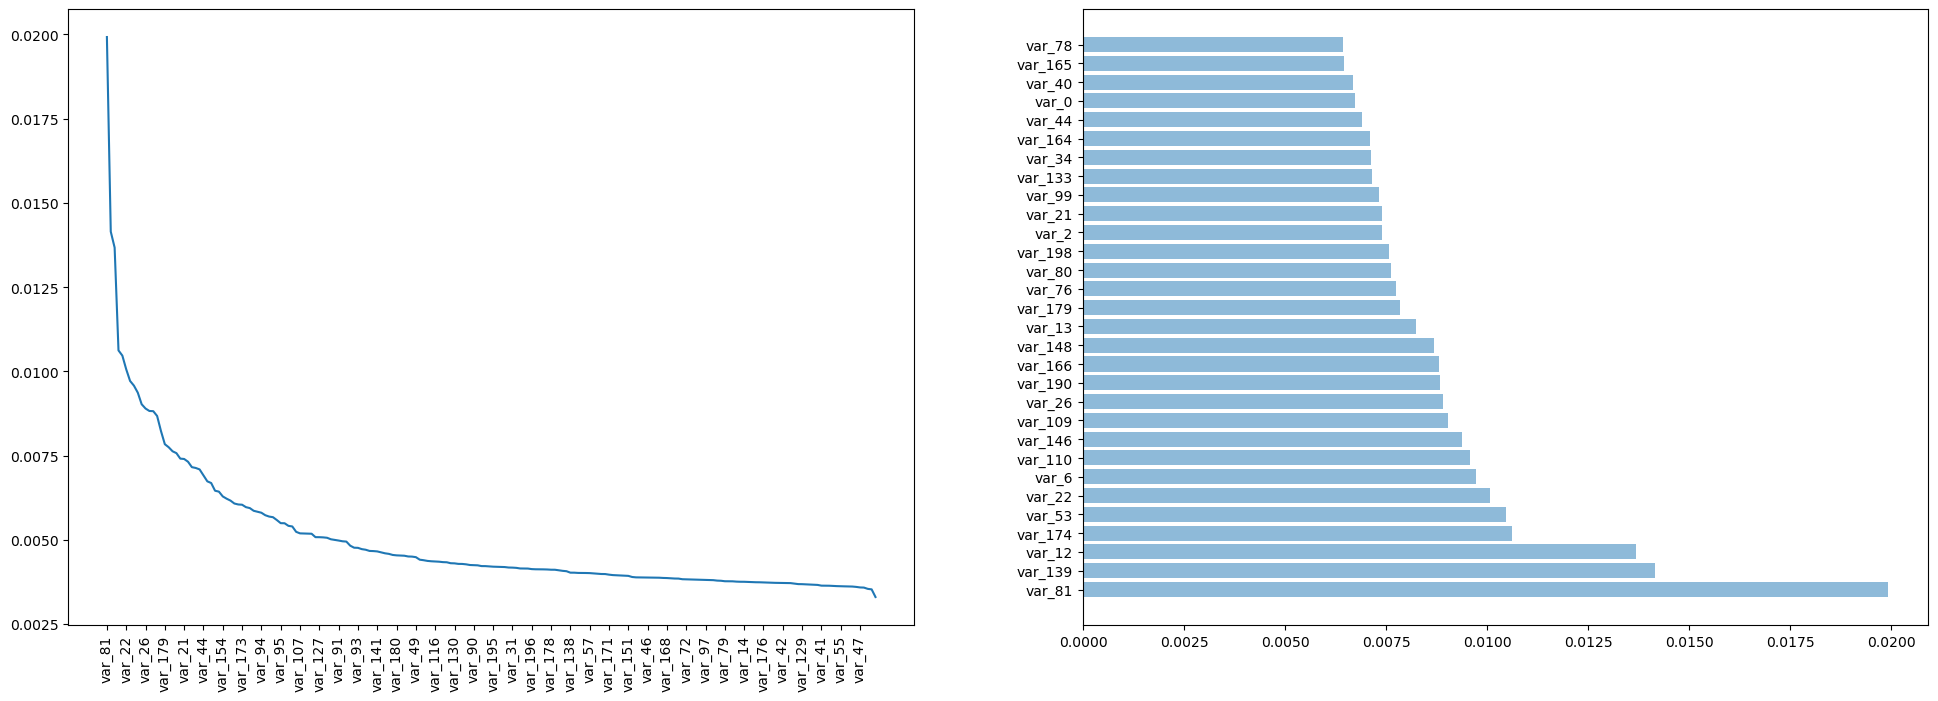

In [194]:
fi = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).sort_values(by='importance', ascending=False)
fi = fi.reset_index()

def plot_feature_importance(fi):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(24,8))
    ax1.plot(np.arange(0, len(fi.index)), fi['importance'])
    label_nrs = np.arange(0, len(fi.index), 5 )
    ax1.set_xticks(label_nrs)
    ax1.set_xticklabels(fi['feature'][label_nrs], rotation=90)
    
    num_bar = min(len(fi.index), 30)
    ax2.barh(np.arange(0, num_bar), fi['importance'][:num_bar], align='center', alpha=0.5)
    ax2.set_yticks(np.arange(0, num_bar))
    ax2.set_yticklabels(fi['feature'][:num_bar])

plot_feature_importance(fi)

In [195]:
feature_importances.median()

importance    0.004206
dtype: float64

In [196]:
to_keep = fi.loc[fi['importance']>0.0039, 'feature']
len(to_keep)

136

In [197]:
X_train = X_train.copy()[to_keep]
X_test = X_test.copy()[to_keep]

In [198]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100building tree 34 of 100

building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100building tree 42 of 100

building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   17.8s finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=2)

In [199]:
y_pred = clf.predict(X_test)
print('Classification Report :',classification_report(y_test, y_pred))
print('Random Forest(w/ Feature Importance) F1 score :', f1_score(y_test, y_pred))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


Classification Report :               precision    recall  f1-score   support

           0       0.72      0.91      0.80      4572
           1       0.79      0.51      0.62      3238

    accuracy                           0.74      7810
   macro avg       0.76      0.71      0.71      7810
weighted avg       0.75      0.74      0.73      7810

Random Forest(w/ Feature Importance) F1 score : 0.6181406750895719


In [200]:
feature_selected_test = test_df[to_keep]
feature_selected_test.head()

,var_81,var_139,var_12,var_174,var_53,var_22,var_6,var_110,var_146,var_109,...,var_102,var_25,var_77,var_152,var_171,var_66,var_20,var_63,var_8,var_151
0,13.2409,-5.7694,14.1682,17.9128,6.4629,0.5232,4.7267,2.6829,14.0199,20.0933,...,28.0259,13.6700,17.4611,6.1966,-1.4970,4.2412,17.3343,4.4409,1.9131,7.1833
1,13.8981,3.2404,13.9628,23.2693,6.5491,3.3033,5.1952,5.8537,9.0704,17.9895,...,31.8062,13.8792,20.9334,10.8331,4.2072,4.7651,18.4607,1.5271,2.5632,11.9829
2,14.9726,15.8422,13.8202,21.9637,5.0666,-0.3657,4.7126,7.2761,10.6274,17.4385,...,21.4424,13.7206,16.4021,6.1413,-1.8008,6.7497,7.9502,4.9070,-3.5385,11.2938
3,16.5924,9.7011,14.1766,15.6426,5.2943,1.7550,4.5284,0.5875,8.6267,20.7749,...,11.0078,13.6960,18.6582,11.5704,1.3736,7.5558,20.1768,1.2266,3.3775,11.0895
4,17.9674,4.2100,14.2331,26.5142,7.3259,5.1716,4.8868,7.9650,11.2951,18.8284,...,8.1869,13.4146,13.3501,7.5472,1.1939,6.6766,20.1739,4.1604,-5.2734,5.5152


In [201]:
prediction_clf = clf.predict(feature_selected_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


In [202]:
submission_clf = pd.DataFrame({"ID_code":submission['ID_code'],
                         "target":prediction_clf})
submission_clf[['target']].value_counts()

target
0         34704
1          5296
dtype: int64

In [203]:
submission.to_csv('submission_clf.csv',index=False)

# + Randomized Search CV

In [204]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

param = dict(n_estimators=n_estimators,
            max_features=max_features,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            bootstrap=bootstrap)

In [205]:
rf_rand = RandomForestClassifier(random_state=42)
rand_search = RandomizedSearchCV(rf_rand, param, cv=5, scoring='f1_macro', verbose=10)
rand_result = rand_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1155
[CV 1/5; 1/10] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1155;, score=0.766 total time=15.3min
[CV 2/5; 1/10] START bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1155
[CV 2/5; 1/10] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1155;, score=0.740 total time=12.9min
[CV 3/5; 1/10] START bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1155
[CV 3/5; 1/10] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1155;, score=0.741 total time=12.6min
[CV 4/5; 1/10] START bootstrap=False, max_depth=100, max_fea

[CV 4/5; 6/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=733;, score=0.705 total time= 3.7min
[CV 5/5; 6/10] START bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=733
[CV 5/5; 6/10] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=733;, score=0.714 total time= 3.8min
[CV 1/5; 7/10] START bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1155
[CV 1/5; 7/10] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1155;, score=0.762 total time=12.2min
[CV 2/5; 7/10] START bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1155
[CV 2/5; 7/10] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=115

In [206]:
print(rand_result.best_params_)

{'n_estimators': 1155, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


In [207]:
clf_rand = RandomForestClassifier(n_estimators=1155, min_samples_split=5, min_samples_leaf=1, max_features='sqrt', max_depth=100, bootstrap=False, random_state=42, verbose=2, n_jobs=-1)
clf_rand.fit(X_train, y_train)
y_pred_rand = clf_rand.predict(X_test)
print('Classification Report :',classification_report(y_test, y_pred_rand))
print('Random Forest(w/ Feature Importance) F1 score :', f1_score(y_test, y_pred_rand))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 1155
building tree 2 of 1155
building tree 3 of 1155
building tree 4 of 1155
building tree 5 of 1155
building tree 6 of 1155
building tree 7 of 1155
building tree 8 of 1155
building tree 9 of 1155
building tree 10 of 1155
building tree 11 of 1155
building tree 12 of 1155
building tree 13 of 1155
building tree 14 of 1155
building tree 15 of 1155
building tree 16 of 1155
building tree 17 of 1155
building tree 18 of 1155
building tree 19 of 1155
building tree 20 of 1155
building tree 21 of 1155
building tree 22 of 1155
building tree 23 of 1155
building tree 24 of 1155
building tree 25 of 1155
building tree 26 of 1155
building tree 27 of 1155
building tree 28 of 1155
building tree 29 of 1155
building tree 30 of 1155
building tree 31 of 1155
building tree 32 of 1155
building tree 33 of 1155
building tree 34 of 1155
building tree 35 of 1155
building tree 36 of 1155
building tree 37 of 1155
building tree 38 of 1155


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.8s


building tree 39 of 1155
building tree 40 of 1155
building tree 41 of 1155
building tree 42 of 1155
building tree 43 of 1155
building tree 44 of 1155
building tree 45 of 1155
building tree 46 of 1155
building tree 47 of 1155
building tree 48 of 1155
building tree 49 of 1155
building tree 50 of 1155
building tree 51 of 1155
building tree 52 of 1155
building tree 53 of 1155
building tree 54 of 1155
building tree 55 of 1155
building tree 56 of 1155
building tree 57 of 1155
building tree 58 of 1155
building tree 59 of 1155
building tree 60 of 1155
building tree 61 of 1155
building tree 62 of 1155
building tree 63 of 1155
building tree 64 of 1155
building tree 65 of 1155
building tree 66 of 1155
building tree 67 of 1155
building tree 68 of 1155
building tree 69 of 1155
building tree 70 of 1155
building tree 71 of 1155
building tree 72 of 1155
building tree 73 of 1155
building tree 74 of 1155
building tree 75 of 1155
building tree 76 of 1155
building tree 77 of 1155
building tree 78 of 1155


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   36.0s


building tree 158 of 1155
building tree 159 of 1155
building tree 160 of 1155
building tree 161 of 1155
building tree 162 of 1155
building tree 163 of 1155
building tree 164 of 1155
building tree 165 of 1155
building tree 166 of 1155
building tree 167 of 1155
building tree 168 of 1155
building tree 169 of 1155
building tree 170 of 1155
building tree 171 of 1155
building tree 172 of 1155
building tree 173 of 1155
building tree 174 of 1155
building tree 175 of 1155
building tree 176 of 1155
building tree 177 of 1155
building tree 178 of 1155
building tree 179 of 1155
building tree 180 of 1155
building tree 181 of 1155
building tree 182 of 1155
building tree 183 of 1155
building tree 184 of 1155
building tree 185 of 1155
building tree 186 of 1155
building tree 187 of 1155
building tree 188 of 1155
building tree 189 of 1155
building tree 190 of 1155
building tree 191 of 1155
building tree 192 of 1155
building tree 193 of 1155
building tree 194 of 1155
building tree 195 of 1155
building tre

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min


building tree 358 of 1155
building tree 359 of 1155
building tree 360 of 1155
building tree 361 of 1155
building tree 362 of 1155
building tree 363 of 1155
building tree 364 of 1155
building tree 365 of 1155
building tree 366 of 1155
building tree 367 of 1155
building tree 368 of 1155
building tree 369 of 1155
building tree 370 of 1155
building tree 371 of 1155
building tree 372 of 1155
building tree 373 of 1155
building tree 374 of 1155
building tree 375 of 1155
building tree 376 of 1155
building tree 377 of 1155
building tree 378 of 1155
building tree 379 of 1155
building tree 380 of 1155
building tree 381 of 1155
building tree 382 of 1155
building tree 383 of 1155
building tree 384 of 1155
building tree 385 of 1155
building tree 386 of 1155
building tree 387 of 1155
building tree 388 of 1155
building tree 389 of 1155
building tree 390 of 1155
building tree 391 of 1155
building tree 392 of 1155
building tree 393 of 1155
building tree 394 of 1155
building tree 395 of 1155
building tre

[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.9min


building tree 641 of 1155
building tree 642 of 1155
building tree 643 of 1155
building tree 644 of 1155
building tree 645 of 1155
building tree 646 of 1155
building tree 647 of 1155
building tree 648 of 1155
building tree 649 of 1155
building tree 650 of 1155
building tree 651 of 1155
building tree 652 of 1155
building tree 653 of 1155
building tree 654 of 1155
building tree 655 of 1155
building tree 656 of 1155
building tree 657 of 1155
building tree 658 of 1155
building tree 659 of 1155
building tree 660 of 1155
building tree 661 of 1155
building tree 662 of 1155
building tree 663 of 1155
building tree 664 of 1155
building tree 665 of 1155
building tree 666 of 1155
building tree 667 of 1155
building tree 668 of 1155
building tree 669 of 1155
building tree 670 of 1155
building tree 671 of 1155
building tree 672 of 1155
building tree 673 of 1155
building tree 674 of 1155
building tree 675 of 1155
building tree 676 of 1155
building tree 677 of 1155
building tree 678 of 1155
building tre

building tree 957 of 1155
building tree 958 of 1155
building tree 959 of 1155
building tree 960 of 1155
building tree 961 of 1155
building tree 962 of 1155
building tree 963 of 1155
building tree 964 of 1155
building tree 965 of 1155
building tree 966 of 1155
building tree 967 of 1155
building tree 968 of 1155
building tree 969 of 1155
building tree 970 of 1155
building tree 971 of 1155
building tree 972 of 1155
building tree 973 of 1155
building tree 974 of 1155
building tree 975 of 1155
building tree 976 of 1155
building tree 977 of 1155
building tree 978 of 1155
building tree 979 of 1155
building tree 980 of 1155
building tree 981 of 1155
building tree 982 of 1155
building tree 983 of 1155
building tree 984 of 1155
building tree 985 of 1155
building tree 986 of 1155
building tree 987 of 1155
building tree 988 of 1155
building tree 989 of 1155
building tree 990 of 1155
building tree 991 of 1155
building tree 992 of 1155
building tree 993 of 1155
building tree 994 of 1155
building tre

[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.5min


building tree 1006 of 1155
building tree 1007 of 1155
building tree 1008 of 1155
building tree 1009 of 1155
building tree 1010 of 1155
building tree 1011 of 1155
building tree 1012 of 1155
building tree 1013 of 1155
building tree 1014 of 1155
building tree 1015 of 1155
building tree 1016 of 1155
building tree 1017 of 1155
building tree 1018 of 1155
building tree 1019 of 1155
building tree 1020 of 1155
building tree 1021 of 1155
building tree 1022 of 1155
building tree 1023 of 1155
building tree 1024 of 1155
building tree 1025 of 1155
building tree 1026 of 1155
building tree 1027 of 1155
building tree 1028 of 1155
building tree 1029 of 1155
building tree 1030 of 1155
building tree 1031 of 1155
building tree 1032 of 1155
building tree 1033 of 1155
building tree 1034 of 1155
building tree 1035 of 1155
building tree 1036 of 1155
building tree 1037 of 1155
building tree 1038 of 1155
building tree 1039 of 1155
building tree 1040 of 1155
building tree 1041 of 1155
building tree 1042 of 1155
b

[Parallel(n_jobs=-1)]: Done 1155 out of 1155 | elapsed:  5.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 1155 out of 1155 | elapsed:    1.5s finished


Classification Report :               precision    recall  f1-score   support

           0       0.75      0.90      0.82      4572
           1       0.80      0.58      0.67      3238

    accuracy                           0.77      7810
   macro avg       0.78      0.74      0.74      7810
weighted avg       0.77      0.77      0.76      7810

Random Forest(w/ Feature Importance) F1 score : 0.6713462922966162


In [209]:
prediction_clf_rand = clf_rand.predict(feature_selected_test)
submission_clf_rand = pd.DataFrame({"ID_code":submission['ID_code'],
                         "target":prediction_clf_rand})
submission_clf_rand[['target']].value_counts()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:    1.4s
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 1155 out of 1155 | elapsed:    4.6s finished


target
0         34278
1          5722
dtype: int64

In [211]:
submission_clf_rand.to_csv('submission_clf_rand.csv',index=False)